### Steps
1. import packages and datasets
2. Statistics
3. Data Cleaning
4. Data Visualization

### 1. Import packages and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/cynding/Desktop/Brandeis 2021 Fall/BUS 256A - Marketing Analytics/final project/marriott_hotel_reviews.csv')
df.shape

(3179, 13)

### 2. Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer         3176 non-null   object 
 1   Member_Type      2277 non-null   object 
 2   Traveler_Type    3164 non-null   object 
 3   Date             3179 non-null   object 
 4   Review           3156 non-null   object 
 5   Total_Score      3179 non-null   float64
 6   Cleanliness      3158 non-null   float64
 7   Dining           2849 non-null   float64
 8   Location         3155 non-null   float64
 9   Service          3155 non-null   float64
 10  Amenities        3118 non-null   float64
 11  Value_for_Money  3152 non-null   float64
 12  Hotel            3179 non-null   object 
dtypes: float64(7), object(6)
memory usage: 323.0+ KB


In [4]:
df.describe()

,Total_Score,Cleanliness,Dining,Location,Service,Amenities,Value_for_Money
count,3179.000000,3158.000000,2849.000000,3155.000000,3155.000000,3118.000000,3152.000000
mean,4.290343,4.480051,3.982450,4.605071,4.453566,4.237011,4.156726
std,1.156291,0.970624,1.178149,0.743161,1.010087,1.038225,1.160081
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### 2. Data Cleaning

The date column is not in datetime format.

In [6]:
df.index = pd.to_datetime(df['Date'],format='%B %d, %Y')

### 3. Data Visualization

1. Percentage of Each Rating
2. Customer Rating Over Time
3. Number of Reviews of Individual Hotel
4. Number of Reviews Over Time
5. Word Cloud

#### 1. Percentage of Each Rating

(-1.114396706665192, 1.1006855666401267, -1.118689809765237, 1.11093720921941)

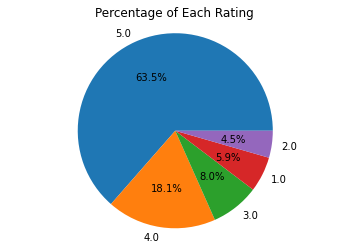

In [7]:
a = df['Total_Score'].value_counts(normalize=True)
# return the relative frequencies of the unique values
plt.pie(a.values,labels = a.index,autopct='%1.1f%%')
plt.title('Percentage of Each Rating')
plt.axis('equal')

More than 80% of the customers gave out the total score of 4 stars or 5 stars, indicating they are satisfied about their stay at the Marriott. 

#### 2. Customer Rating Over Time

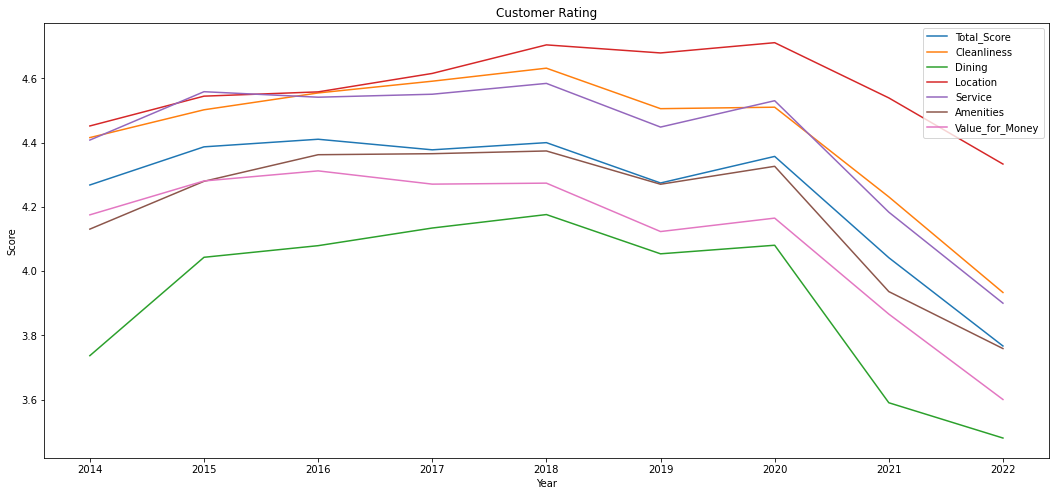

In [8]:
def plot_line_chart(dataframe,title_,size_=(18,8),rot_=0,legend_='upper right'):
    dataframe_m = dataframe.groupby(pd.Grouper(freq='Y')).mean()
    dataframe_m.index = pd.DatetimeIndex(dataframe_m.index).year
    ax = dataframe_m.plot(
    kind = 'line',
    figsize = size_,
    rot = rot_,
    title = title_
    )
    plt.legend(['Total_Score','Cleanliness','Dining','Location','Service','Amenities','Value_for_Money'],loc=legend_)
    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.show()
plot_line_chart(df,'Customer Rating')

We can see that the overall rating reaches the peak in year 2020 and has been declining after that. Dining has always been the area with the lowest score and Location has been the area with the highest score since 2017.

#### 3. Number of Reviews of individual hotel

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

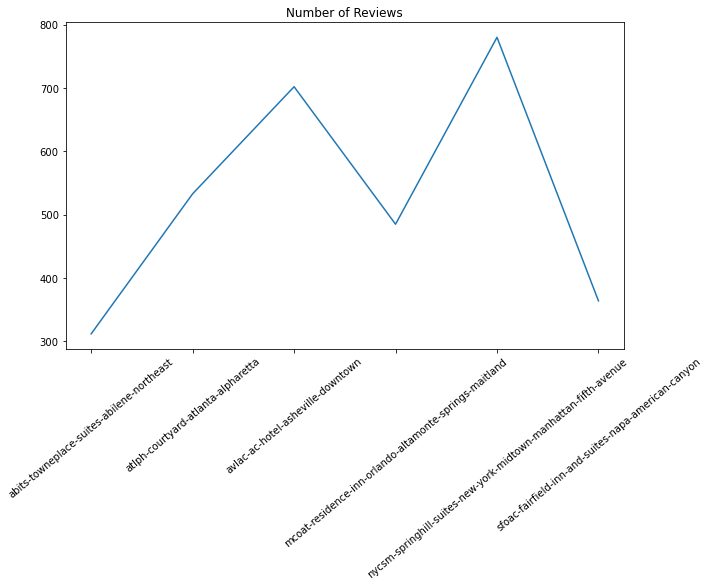

In [23]:
df_h = df[['Customer']].groupby(df['Hotel']).count()

plt.figure(figsize=(10, 6))
plt.plot(df_h['Customer'])
plt.title('Number of Reviews')
plt.xticks(rotation=40)

#### 4. Number of Reviews Over Time

Text(0.5, 1.0, 'number of reviews')

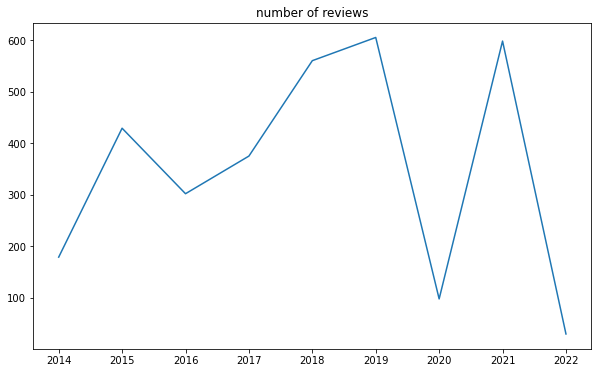

In [100]:
df_c = df[['Customer']].groupby(pd.Grouper(freq='Y')).count()
df_c.index = pd.DatetimeIndex(df_c.index).year

plt.figure(figsize=(10, 6))
plt.plot(df_c['Customer'])
plt.title('number of reviews')

Notably, many hotel has been shutting time during the pandemic in 2020. Thus, the number of reviews reaches its bottom in 2020.

#### 5. Word Cloud

I define those reviews with total_score greater than 3 as positive reviews and the remaining as negative reviews.
I print some wordcoulds to have a glimpse at what kind of words appear in out reviews.

In [26]:
df_positive = df[df['Total_Score']>=4]
df_negative = df[df['Total_Score']<4]

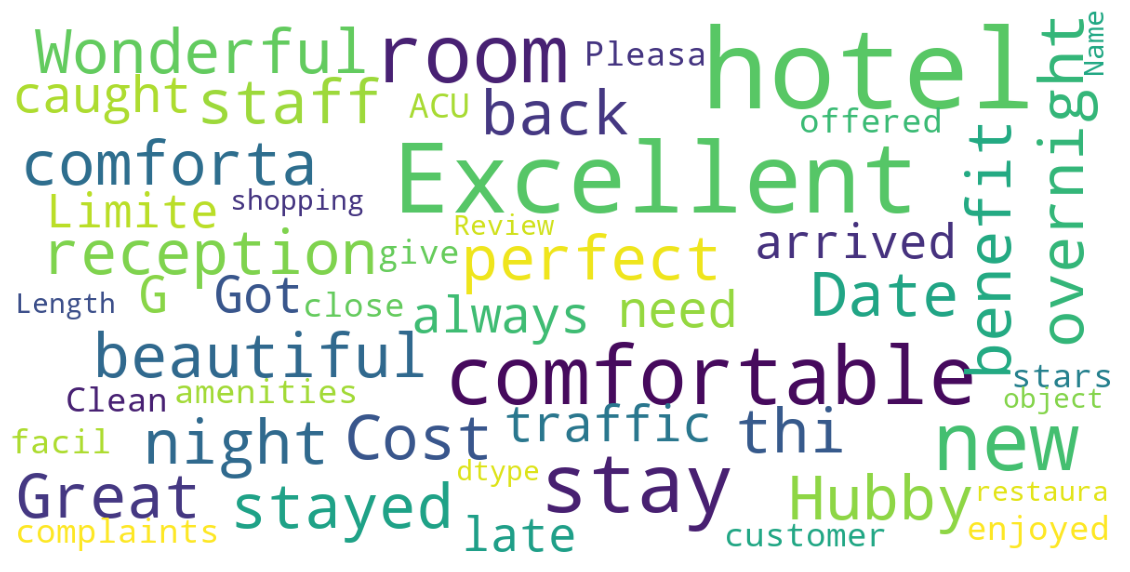

In [27]:
# wordcloud function

from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_positive['Review'])

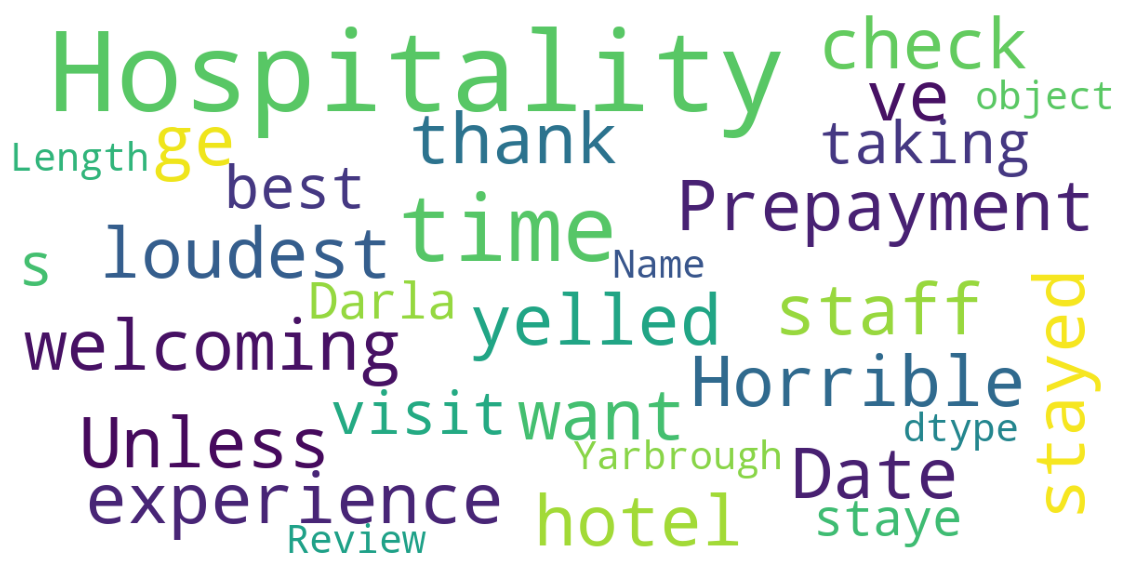

In [103]:
show_wordcloud(df_negative['Review'])